In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib

In [2]:
df = pd.read_csv("FuelConsumption.csv")

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

In [8]:
cdf.corr()

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
CYLINDERS,1.000000,0.934011,0.849685,0.776788
ENGINESIZE,0.934011,1.000000,0.874154,0.819482
CO2EMISSIONS,0.849685,0.874154,1.000000,0.892129
FUELCONSUMPTION_COMB,0.776788,0.819482,0.892129,1.000000


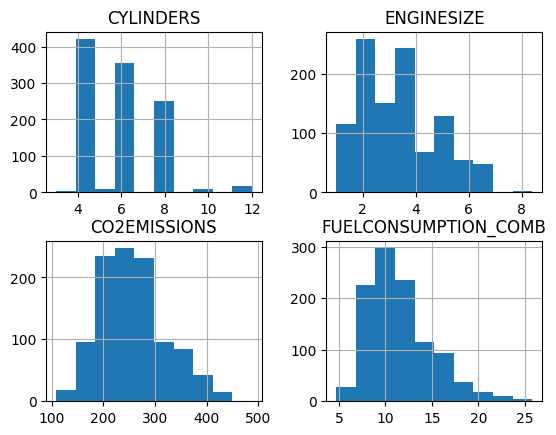

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

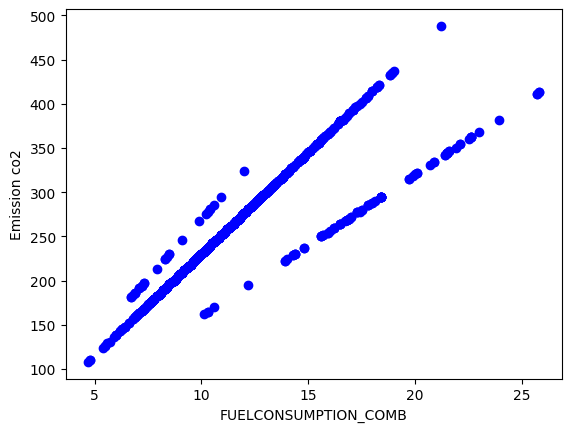

In [10]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission co2")
plt.show()

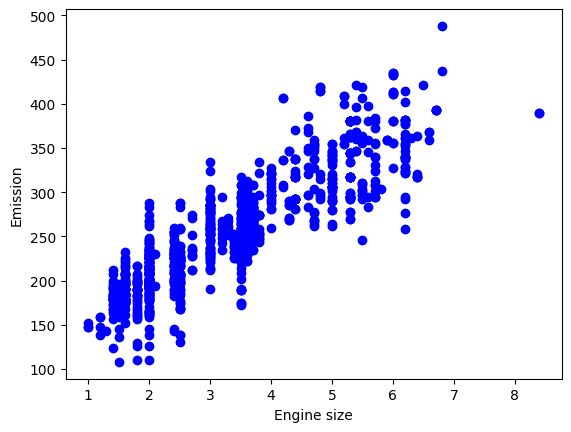

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
w=np.random.rand(len(df))
msk = w < 0.8
train = cdf[msk]
test = cdf[~msk]


xtrain = np.asanyarray(train[['ENGINESIZE']])
ytrain = np.asanyarray(train[['CO2EMISSIONS']])

xtest = np.asanyarray(test[['ENGINESIZE']])
ytest = np.asanyarray(test[['CO2EMISSIONS']])

In [14]:
from sklearn import linear_model as lm
regr = lm.LinearRegression()

regr.fit (xtrain,ytrain)

LinearRegression()

In [15]:
x=2.00
y= x*regr.coef_[0][0]+regr.intercept_[0]
print(y)

203.88705780087298


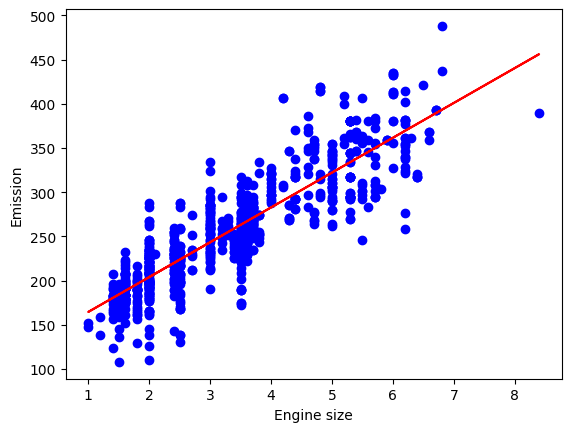

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
y=regr.coef_[0][0]*xtrain + regr.intercept_[0]
plt.plot(xtrain,y , '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
from sklearn.metrics import r2_score as r2



test_y_ = regr.predict(xtest)


print(r2(ytest , test_y_))

0.7818904471670806
